In [1]:
from IPython.core.debugger import set_trace

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
df = pd.read_csv("BBCA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-15,6830.0,6890.0,6720.0,6800.0,6683.568848,83922000
1,2021-02-16,6880.0,6945.0,6830.0,6940.0,6821.171875,47221000
2,2021-02-17,6890.0,6960.0,6850.0,6900.0,6781.856934,66011500
3,2021-02-18,6850.0,6900.0,6735.0,6735.0,6619.682129,91204000
4,2021-02-19,6780.0,6850.0,6760.0,6825.0,6708.140625,70487500
...,...,...,...,...,...,...,...
241,2022-02-04,7750.0,7800.0,7700.0,7725.0,7725.000000,39324700
242,2022-02-07,7775.0,7800.0,7700.0,7800.0,7800.000000,56813200
243,2022-02-08,7750.0,7850.0,7725.0,7725.0,7725.000000,61883100
244,2022-02-09,7850.0,7950.0,7800.0,7950.0,7950.000000,108922200


In [3]:
df = df[["Close"]].copy()

In [4]:
df.describe()

,Close
count,246.000000
mean,6810.691057
std,573.376973
min,5960.000000
25%,6356.250000
50%,6600.000000
75%,7375.000000
max,7950.000000


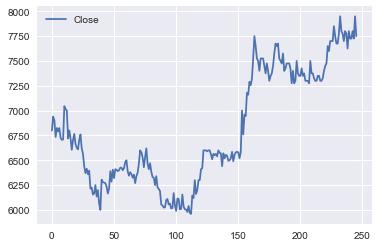

In [5]:
df.plot()
plt.show()

# Check Correlation and Autocorrelation

## ACF (AutoCorrelation Function)

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

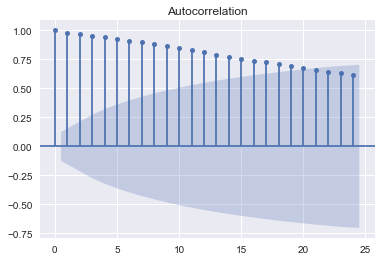

In [7]:
plot_acf(df)
plt.show()

## PACF (Partial AutoCorrelation Function)

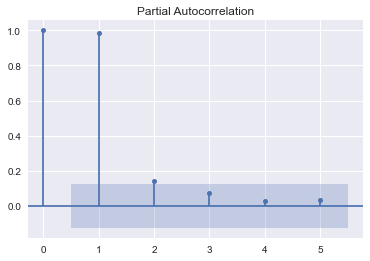

In [8]:
plot_pacf(df, lags=5)
plt.show()

 ## Train Test Split

In [9]:
n = int(len(df) * 0.8)
train = df.Close[:n]
test = df.Close[n:]

In [10]:
print(len(train))
print(len(test))

196
50


## Training ARIMA model

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
model = ARIMA(train, order=(0,0,1))
result = model.fit(disp=2)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05986D+00    |proj g|=  4.03055D-03

At iterate    2    f=  7.05979D+00    |proj g|=  1.36781D-05

At iterate    4    f=  7.05979D+00    |proj g|=  4.84945D-05

At iterate    6    f=  7.05979D+00    |proj g|=  2.30571D-04

At iterate    8    f=  7.05979D+00    |proj g|=  6.79723D-04

At iterate   10    f=  7.05978D+00    |proj g|=  1.20934D-03

At iterate   12    f=  7.05977D+00    |proj g|=  4.15223D-04

At iterate   14    f=  7.05977D+00    |proj g|=  8.88188D-08

At iterate   16    f=  7.05977D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Users/yoelagustinus/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
